## Introdução

### Abertura dos Arquivos

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('pizza.csv')

In [3]:
df.head(5)

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67


In [12]:
df.describe()

,id,mois,prot,fat,ash,sodium,carb,cal
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,20841.040000,40.903067,13.373567,20.229533,2.633233,0.669400,22.864767,3.271000
std,6962.917222,9.552987,6.434392,8.975658,1.269724,0.370358,18.029722,0.620034
min,14003.000000,25.000000,6.980000,4.380000,1.170000,0.250000,0.510000,2.180000
25%,14093.750000,30.902500,8.060000,14.770000,1.450000,0.450000,3.467500,2.910000
50%,24020.500000,43.300000,10.440000,17.135000,2.225000,0.490000,23.245000,3.215000
75%,24110.250000,49.115000,20.022500,21.435000,3.592500,0.702500,41.337500,3.520000
max,34045.000000,57.220000,28.480000,47.200000,5.430000,1.790000,48.640000,5.080000


**Sobre o dataset:** o dataset contém, para cada marca, diferentes pizzas, cada qual com valores nutricionais (proteínas, gorduras, carboidratos, calorias etc) também distintos. Como o número de colunas não permite a visualização gráfica dos clusters de cada marca, o objetivo deste portfólio é reduzir o número de variáveis para 2 (PCA 1 e PCA 2), de forma a permitir a visualização gráfica dos clusters

### Separação das variáveis dependentes e independentes

In [4]:
df_var = df[['mois','prot','fat','ash','sodium','carb','cal']]
marca = df.iloc[:,0]

## Resolução Passo-a-Passo

**Ideia central do PCA:** o PCA é uma técnica de redução de dimensionalidade (número de variáveis), tendo como contra-partida a perda de informação. A ideia do método, portanto, é conseguir maximizar a redução de dimensionalidade e minimizar a perda de informação. Para tanto, uma série de etapas são necessárias, como vemos abaixo:

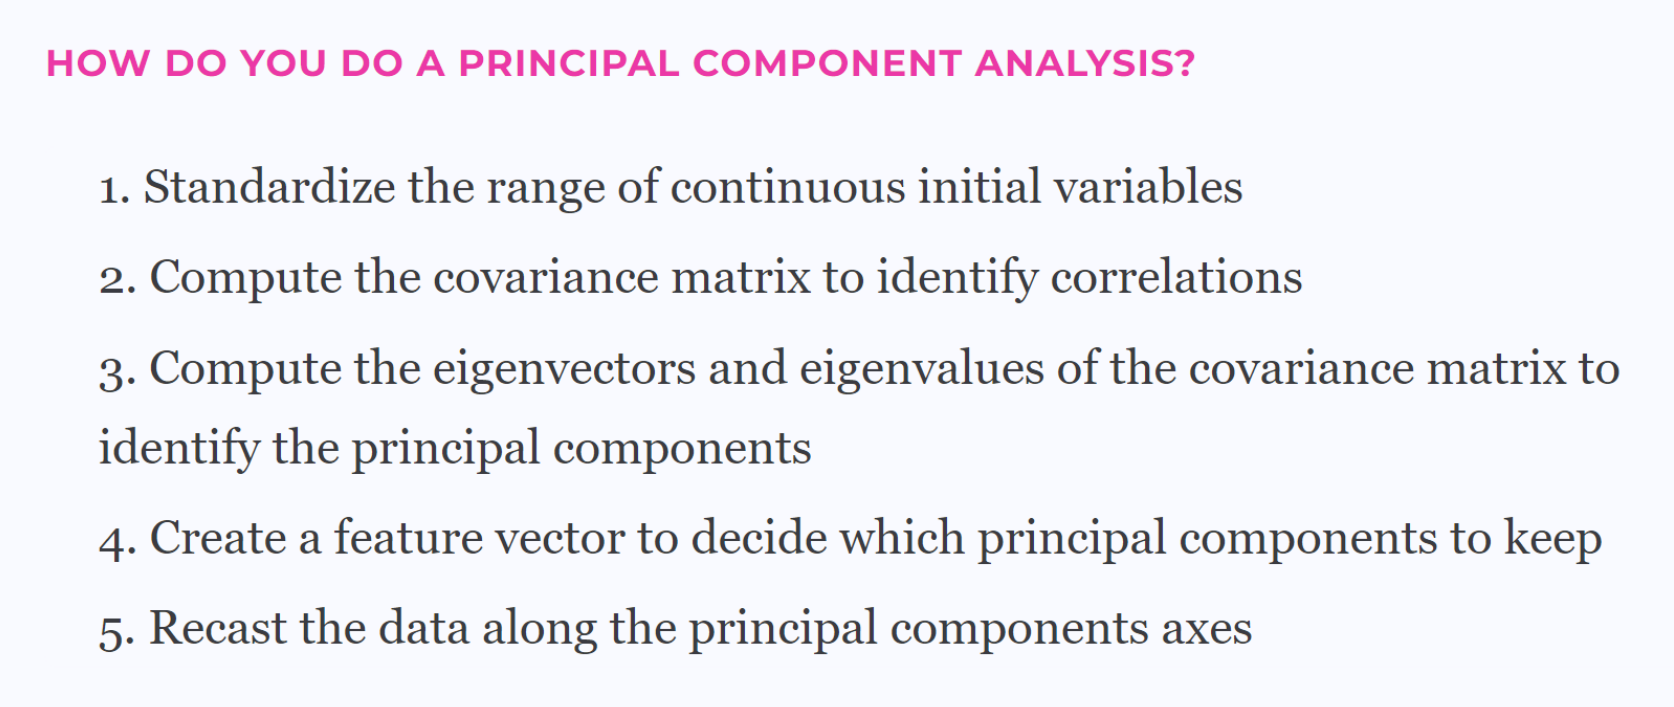

In [5]:
#Passo 1: Normalização dos Dados - para que seja obtido o real efeito de cada variável
df_norm = (df_var - df_var.mean()) / df_var.std(ddof=0)

<AxesSubplot:>

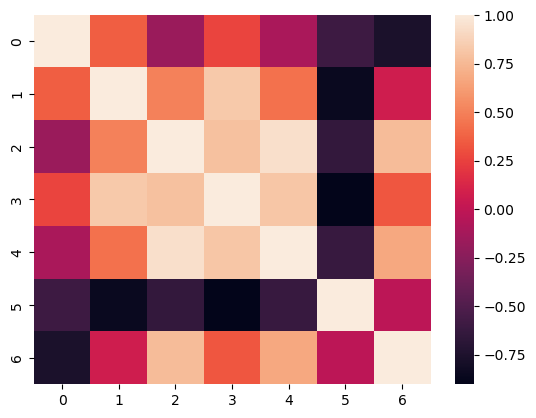

In [6]:
#Passo 2: Funções para criação da matriz de covariância - objetiva relacionar as variáveis entre si, para verificar o quão
#"única" é a contribuição de cada uma delas. Quanto maior for sua "unicidade", mais importante a variável é para o modelo
cov_matrix = np.cov(df_norm, rowvar=False)
sns.heatmap(cov_matrix)

**Análise da matriz de covariância:**
1. Nota-se que as variáveis 1 (proteínas), 2 (gorduras), 3 (cinzas) e 4 (sódio) apresentam correlação positiva significativa entre si. Por outro lado, a variável 5 (carboidrato) apresenta correlação significativamente negativa com essas variáveiss e as variáveis 0 (mois) e 6 (calorias) apresentam correlação negativa elevada entre si e baixa correlação modular com todas as demais marcas. 
2. Logo, é provável que mois, carboidratos e calorias sejam os fatores mais importantes para a definição dos clusters

In [7]:
#Passo 3: Cálculo dos Autovalores e Autovetores - usados para determinar, matematicamente, os componentes principais,
#ou seja, aqueles mais explicativos do modelo
autovalores , autovetores = np.linalg.eigh(cov_matrix)

In [8]:
#Passo 4: Nesse momento, temos calculados os autovalores e os autovetores. Desejamos selecionar os autovetores associados 
#aos 2 maiores autovalores (foram selecionados 2 PCAs para melhor visualização dos dados), pois estes serão nossas novas 
#colunas PCA 1 e PCA 2
index_corr = np.argsort(autovalores)[::-1]
autovalores_corr = autovalores[index_corr]
autovetores_corr = autovetores[:,index_corr]
pca_dois = autovetores_corr[:, 0:2]

In [9]:
#Passo 5: por fim, é necessária a realização de uma transformação linear para "encaixar" o dataset original nos vetores
#dos componentes principais
pca_reduzido = np.dot(pca_dois.transpose() , df_var.transpose() ).transpose()

## Visualização do Resultado Final

In [10]:
df_final = pd.DataFrame(pca_reduzido , columns = ['PCA1','PCA2'])
df_final = pd.concat([df_final , pd.DataFrame(marca)] , axis = 1)

<AxesSubplot:xlabel='PCA1', ylabel='PCA2'>

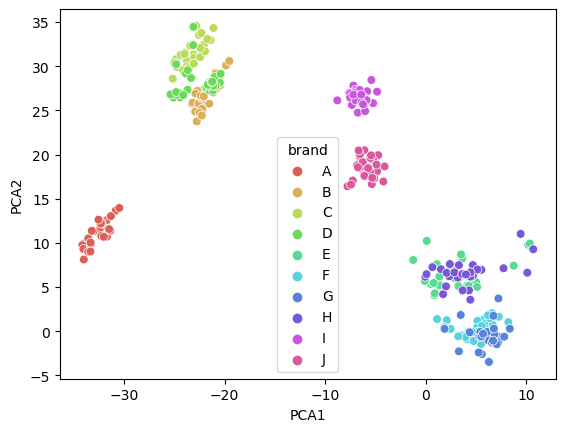

In [11]:
sns.scatterplot(data = df_final , x = 'PCA1',y = 'PCA2' , hue = 'brand' , s = 40 , palette= 'hls')

**Análise do Resultado Final:**
1. Nota-se que as marcas A, I e J apresentam pizzas "únicas", por assim dizer, com clusters bem definidos e claramente distintas das demais marcas. 
2. Por outro lado, há semelhança nutricional entre as pizzas das marcas B, C e D; o mesmo fenômeno ocorre para as marcas E, F, G e H